# Basic Example

*TulipaProfileFitting.jl* is a package designed to fit power availability production profiles of renewable sources, such as wind and solar, from an existing base profile. This example shows how to use the package and explore the results.

If you encounter any problems, be sure to check whether you're using the same Julia version as is used here you should get a warning when activating the environment if this is not the case. The file **Project.toml** in this directory contains the necessary packages to run this notebook properly.

First things fist, activate the Julia environment to ensure consistency accross computers.

In [1]:
using Pkg
Pkg.activate(@__DIR__) # @__DIR__ = directory this script is in
Pkg.instantiate() # Download and install this environment packages that are in the Project.toml file
Pkg.precompile() # Precompiles all packages in environemt
println("Done")

  Activating project at `c:\github-repos\TulipaProfileFitting.jl\notebooks`


Done


In [2]:
import TulipaProfileFitting
import CSV
import Plots
import DataFrames
import HTTP

## Fitting a wind renewable profile

First, we need a base renewable profile to adjust it to a new target capacity factor of full load hours. For this example, we have generated a wind availability profile using the online tool [Renewables Ninja](https://www.renewables.ninja/). The resulting profile is stored in this repository at the URL shown below, where you can also find the parameters used to generate the values.

Then we can read the file into a dataframe to handle the data inside Julia. We show the first rows of the data to explore rows and columns.

In [3]:
file_url = "https://raw.githubusercontent.com/TulipaEnergy/TulipaProfileFitting.jl/main/docs/src/files/wind_power_profile.csv"
df = DataFrames.DataFrame(CSV.File(HTTP.get(file_url).body, header=4))
show(stdout, MIME("text/html"), first(df, 5); eltypes=false)

Row,time,local_time,electricity
1,2019-01-01 00:00,2019-01-01 01:00,0.776
2,2019-01-01 01:00,2019-01-01 02:00,0.798
3,2019-01-01 02:00,2019-01-01 03:00,0.809
4,2019-01-01 03:00,2019-01-01 04:00,0.844
5,2019-01-01 04:00,2019-01-01 05:00,0.871


From the column `electricity` in the dataframe we can get the profile values as follows:

In [4]:
profile_values = df.electricity

8760-element Vector{Float64}:
 0.776
 0.798
 0.809
 0.844
 0.871
 0.878
 0.887
 0.876
 0.845
 0.802
 ⋮
 0.15
 0.204
 0.264
 0.31
 0.32
 0.3
 0.295
 0.316
 0.327

The current capacity factor of full load hours (e.g., mean value) can be determined using the following command:

In [5]:
current_cp = round(sum(profile_values)/8760;digits=2)

0.52

Let's define a new capacity factor of full load hours to fit the profile

In [6]:
target_cp = 0.6

0.6

We can use the function `find_solution` in this package to obtain the coefficient that fit the values to the target.

In [7]:
coefficient = TulipaProfileFitting.find_solution(profile_values, target_cp)

0.7307294689688651

The coefficient is the output of solving a non-linear equation `f(x)=0`, and we use it to determine the new profile and plot the power production curves.

In [8]:
fitted_profile = profile_values.^coefficient

8760-element Vector{Float64}:
 0.8308425195328141
 0.8479897930411893
 0.8565155896623244
 0.883438364465284
 0.9040022226379142
 0.9093054155326858
 0.9161071112992317
 0.9077913830960715
 0.8842031174503315
 0.8510937220415896
 ⋮
 0.25000322051924556
 0.3129870860989321
 0.3778756825352759
 0.42493548646241
 0.43490911155461154
 0.41487483445825
 0.40981072812130404
 0.43092987914156144
 0.441840719158078

We can plot the results using:

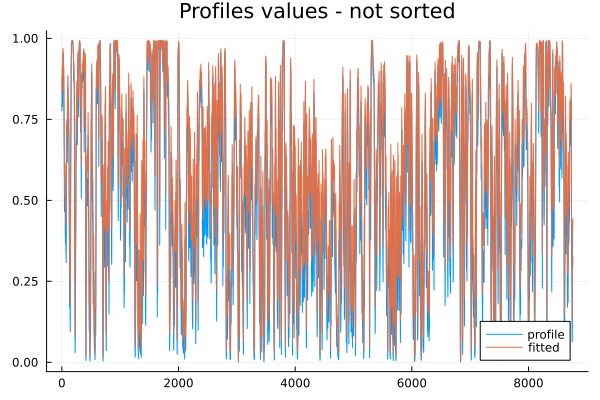

In [9]:
Plots.plot(profile_values, label="profile")
Plots.plot!(fitted_profile, label="fitted")
Plots.plot!(title="Profiles values - not sorted")

The full-year plot helps to give an overview of the results, but we can zoom in to get a better sense of the fitted profile compared to the base profile. Here, we select the first two weeks of the time series as a sample.

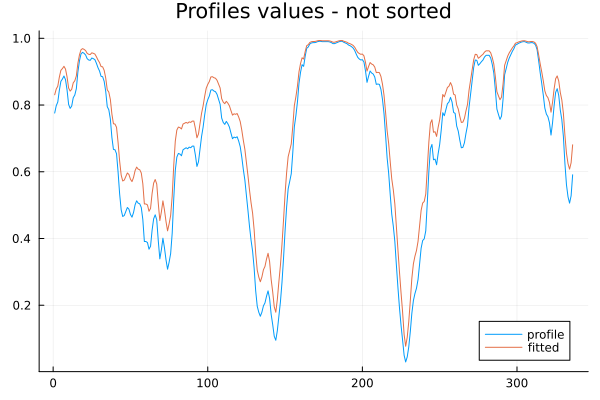

In [10]:
filtered_range = 1:336
Plots.plot(profile_values[filtered_range], label="profile")
Plots.plot!(fitted_profile[filtered_range], label="fitted")
Plots.plot!(title="Profiles values - not sorted")


Here, we can see that fitted values closer to one increase less compared to the base profile, whereas the other values increase more to achieve the target capacity factor of full load hours.

Another way to see this result is to look at the duration curve, i.e., sorting the value from the maximum to the minimum through the year.

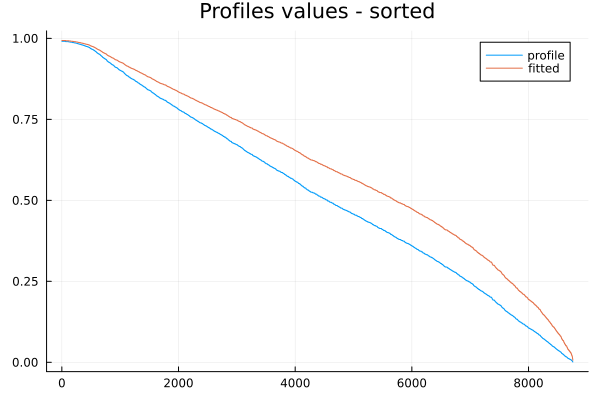

In [11]:
Plots.plot(sort(profile_values,rev=true), label="profile")
Plots.plot!(sort(fitted_profile,rev=true), label="fitted")
Plots.plot!(title="Profiles values - sorted")

## Fitting a solar renewable profile

Let's take now a look to the results of in a solar profile. We generate the base solar pv availability profile again from the [Renewables Ninja](https://www.renewables.ninja/) online tool. The resulting file is available in the url below. So, let's explore the values in the file.

In [12]:
file_url = "https://raw.githubusercontent.com/TulipaEnergy/TulipaProfileFitting.jl/main/docs/src/files/solar_pv_profile.csv"
df = DataFrames.DataFrame(CSV.File(HTTP.get(file_url).body, header=4))
show(stdout, MIME("text/html"), first(df, 24); eltypes=false)

Row,time,local_time,electricity
1,2019-01-01 00:00,2019-01-01 01:00,0.0
2,2019-01-01 01:00,2019-01-01 02:00,0.0
3,2019-01-01 02:00,2019-01-01 03:00,0.0
4,2019-01-01 03:00,2019-01-01 04:00,0.0
5,2019-01-01 04:00,2019-01-01 05:00,0.0
6,2019-01-01 05:00,2019-01-01 06:00,0.0
7,2019-01-01 06:00,2019-01-01 07:00,0.0
8,2019-01-01 07:00,2019-01-01 08:00,0.004
9,2019-01-01 08:00,2019-01-01 09:00,0.286
10,2019-01-01 09:00,2019-01-01 10:00,0.518


We can then get the base profile values from the dataframe and determine the current capacity factor of full load hours

In [13]:
profile_values = df.electricity
current_cp = round(sum(profile_values)/8760;digits=2)

0.2

We define the new target capacity factor of full load hours, calculate the coefficient, and determine the fitted profile with this value.

In [14]:
target_cp = 0.24
coefficient = TulipaProfileFitting.find_solution(profile_values, target_cp)
fitted_profile = profile_values.^coefficient

8760-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.015247924285306243
 0.3873628668273222
 0.6075235684273965
 ⋮
 0.4804241051513852
 0.1916764783199889
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

We explore the results by plotting the whole year and zooming in on the week in the profiles.

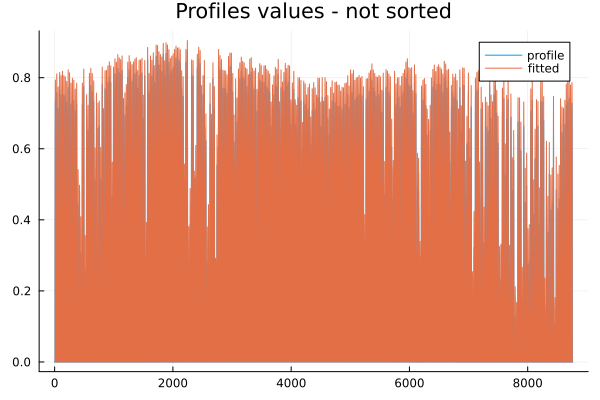

In [15]:
Plots.plot(profile_values, label="profile")
Plots.plot!(fitted_profile, label="fitted")
Plots.plot!(title="Profiles values - not sorted")

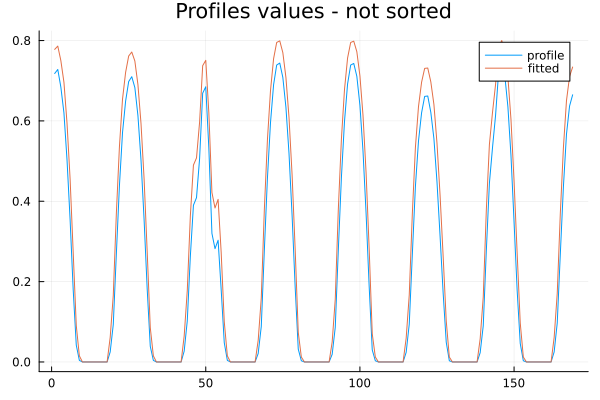

In [16]:
filtered_range = 4380:4548
Plots.plot(profile_values[filtered_range], label="profile")
Plots.plot!(fitted_profile[filtered_range], label="fitted")
Plots.plot!(title="Profiles values - not sorted")

Finally, we can plot the duration curve of both profiles to give a general idea of the values in the both profiles. Here, the fitted curve mainly impacts the middle value across the entire range. The zero values stay constant, and as the base profile value increases, the amount of increase decreases. This result is anticipated since the main purpose of the package is to modify the middle value, thereby increasing or decreasing the capacity factor.

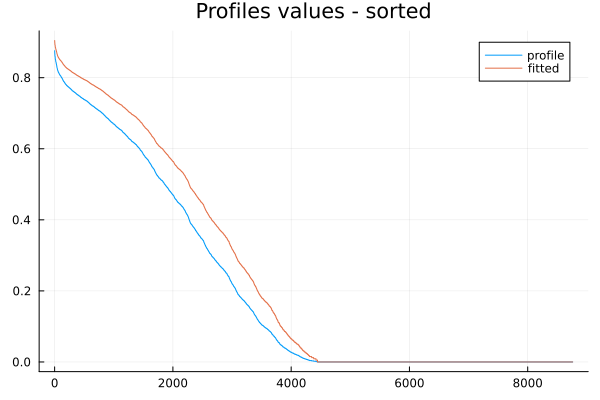

In [17]:
Plots.plot(sort(profile_values,rev=true), label="profile")
Plots.plot!(sort(fitted_profile,rev=true), label="fitted")
Plots.plot!(title="Profiles values - sorted")